# Шаг 1 Изучение информации

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.<br>
Необходимо сделать предварительный анализ тарифов на небольшой выборке из 500 клиентов клиентов. По клиентам имеются данные: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

In [3]:
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd
import seaborn as sns

#Функция для показа информации по датасету
def show_data_info(df):
    print(df.info())
    print(df.describe())
    print()
    print(df.head())    

df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

<hr>

## Шаг 1.1 Таблица df_calls

In [4]:
show_data_info(df_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000


**call_date** - преобразовать в типа Дата <br>
**duration** - есть звонки с нулевой длительностью и в 38 минут (хотя 38 минут вполне реальное значение). Также неободимо округлить длительность каждого звонка до большего целого исходя из ТЗ: <br>
<blockquote>
«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута
</blockquote>
Затем можно преобразовать в тип Целое

<hr>

## Шаг 1.2 Таблица df_internet

In [5]:
show_data_info(df_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB
None
             mb_used        user_id
count  149396.000000  149396.000000
mean      370.192426    1252.099842
std       278.300951     144.050823
min         0.000000    1000.000000
25%       138.187500    1130.000000
50%       348.015000    1251.000000
75%       559.552500    1380.000000
max      1724.830000    1499.000000

       id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1  1052.81   2018-09-07     1000
2  1000_2  1197.26   2018-06-25     1000
3  1000_3   550.27   2018-08-22     1000
4  1000_4   302.56   2018-09-24     1000


**mb_used** - есть с сессии с нулевым траффиком <br>
**session_date** - преобразовать в тип Дата

<hr>

## Шаг 1.3 Таблица df_messages

In [6]:
show_data_info(df_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000

       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000


**message_date** - преобразовать в тип Дата

<hr>

## Шаг 1.4 Таблица df_tariffs

In [7]:
show_data_info(df_tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
       messages_included  mg_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.50

<hr>

## Шаг 1.5 Таблица df_users

In [8]:
show_data_info(df_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000

   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-0

**churn_date** - есть пропуски, но это значит, что тариф действовал на момент выгрузки датасетов <br>
**reg_date**, **churn_date** - преобразовать в тип Дата

<hr>

## Шаг 1 Вывод

Пропусков в таблицах нет. Надо разобраться с нулевыми сессиями и звонками в таблицах **df_internet** и **df_calls**. Также следует преобразовать столбцы с датами в тип Дата

# Шаг 2. Подготовка данных

## Шаг 2.1 Преобразование типов данных

Преобразуем строки в даты

In [9]:
df_calls['pr_call_date'] = pd.to_datetime(df_calls['call_date'], format="%Y-%m-%d")
# Добавляем столбец: месяц
df_calls['month'] = pd.DatetimeIndex(df_calls['pr_call_date']).month
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 6 columns):
id              202607 non-null object
call_date       202607 non-null object
duration        202607 non-null float64
user_id         202607 non-null int64
pr_call_date    202607 non-null datetime64[ns]
month           202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.3+ MB


In [10]:
df_internet['pr_session_date'] = pd.to_datetime(df_internet['session_date'], format="%Y-%m-%d")
# Добавляем столбец: месяц
df_internet['month'] = pd.DatetimeIndex(df_internet['pr_session_date']).month
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
id                 149396 non-null object
mb_used            149396 non-null float64
session_date       149396 non-null object
user_id            149396 non-null int64
pr_session_date    149396 non-null datetime64[ns]
month              149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 6.8+ MB


In [11]:
df_messages['pr_message_date'] = pd.to_datetime(df_messages['message_date'], format="%Y-%m-%d")
# Добавляем столбец: месяц
df_messages['month'] = pd.DatetimeIndex(df_messages['pr_message_date']).month
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 5 columns):
id                 123036 non-null object
message_date       123036 non-null object
user_id            123036 non-null int64
pr_message_date    123036 non-null datetime64[ns]
month              123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.7+ MB


In [12]:
df_users['pr_reg_date'] = pd.to_datetime(df_users['reg_date'], format="%Y-%m-%d")
df_users['pr_churn_date'] = pd.to_datetime(df_users['churn_date'], format="%Y-%m-%d")
df_users['reg_month'] = pd.DatetimeIndex(df_users['pr_reg_date']).month
df_users['churn_month'] = pd.DatetimeIndex(df_users['pr_churn_date']).month
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
user_id          500 non-null int64
age              500 non-null int64
churn_date       38 non-null object
city             500 non-null object
first_name       500 non-null object
last_name        500 non-null object
reg_date         500 non-null object
tariff           500 non-null object
pr_reg_date      500 non-null datetime64[ns]
pr_churn_date    38 non-null datetime64[ns]
reg_month        500 non-null int64
churn_month      38 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 47.0+ KB


Значения дат приведены в соответствующий типа данных

<hr>

## Шаг 2.2 Обработка ошибок в данных

### Шаг 2.2.1  Звонки с 0 длительностью

In [13]:
print('Количество нулевых звонков:', len(df_calls[df_calls['duration'] == 0]))
print('Доля нулевых звонков:', (len(df_calls[df_calls['duration'] == 0])/len(df_calls)))

Количество нулевых звонков: 39613
Доля нулевых звонков: 0.19551644316336553


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc955feb0f0>]],
      dtype=object)

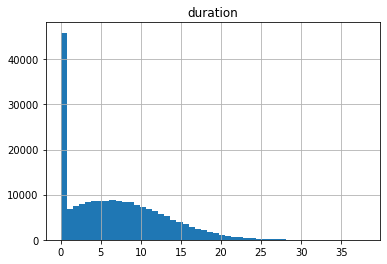

In [14]:
df_calls.hist('duration', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc954d04748>]],
      dtype=object)

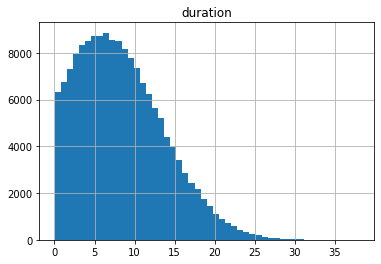

In [15]:
df_calls[df_calls['duration'] != 0].hist('duration', bins=50)

In [16]:
df_calls[df_calls['duration'] != 0].describe()

,duration,user_id,month
count,162994.000000,162994.000000,162994.000000
mean,8.397794,1254.149877,8.572960
std,5.353022,144.751050,2.787315
min,0.010000,1000.000000,1.000000
25%,4.170000,1126.000000,7.000000
50%,7.740000,1261.000000,9.000000
75%,11.850000,1379.000000,11.000000
max,38.000000,1499.000000,12.000000


Нулевые звонки составляют около 20% всех звонков. Причина появления: возможно пользователи случайно набирали номера и успели сбрасывать. Стоило бы уточнить: значение **duration** начинает отсчитываться в момент, когда пользователю ответили или сразу с момента вызова? Если сразу, то нулевые значения - это вероятно неотвеченнные звонки. <br>
Тем не менее эти данные лучше удалить, чем присваивать им среднее/медианое значение, т.к. они влияют на среднее значение (было: 6.7 мин , стало: 8.4 мин.) и на нижний квартиль (было: 1.3 мин., стало: 4.17 мин.) <br>
Затем данные округлим в большую сторону и преобразуем в тип int

In [17]:
df_calls = df_calls[df_calls['duration'] > 0]

In [18]:
df_calls['duration'] = df_calls['duration'].apply(math.ceil).astype('int')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 6 columns):
id              162994 non-null object
call_date       162994 non-null object
duration        162994 non-null int64
user_id         162994 non-null int64
pr_call_date    162994 non-null datetime64[ns]
month           162994 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 8.7+ MB


<hr>

### Шаг 2.2.2  Интернет-сессии с 0 трафиком

In [19]:
print('Количество нулевых звонков:', len(df_internet[df_internet['mb_used'] == 0]))
print('Доля нулевых звонков:', (len(df_internet[df_internet['mb_used'] == 0])/len(df_internet)))

Количество нулевых звонков: 19598
Доля нулевых звонков: 0.13118155773916304


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9543fbe10>]],
      dtype=object)

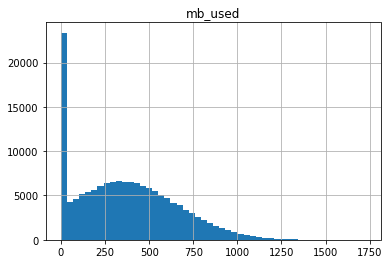

In [20]:
df_internet.hist('mb_used', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9547f2e80>]],
      dtype=object)

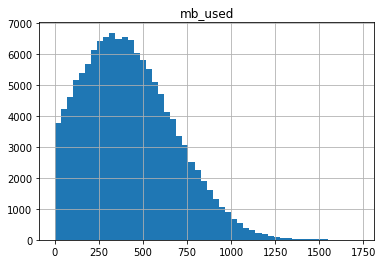

In [21]:
df_internet[df_internet['mb_used'] != 0].hist('mb_used', bins=50)

In [22]:
df_internet[df_internet['mb_used'] != 0].describe()

,mb_used,user_id,month
count,129798.000000,129798.000000,129798.000000
mean,426.087210,1253.046318,8.558013
std,255.596447,143.782672,2.787862
min,0.030000,1000.000000,1.000000
25%,227.460000,1132.000000,7.000000
50%,400.540000,1252.000000,9.000000
75%,592.947500,1380.000000,11.000000
max,1724.830000,1499.000000,12.000000


Нулевых значений около 13%. Вероятно появились из-за того, что приложения в телефоне в фоновом режиме пытаются обновить информацию или использование приложений, трафик которых не учитывается (мессенджеры, музыкадбные приложения и т.д.) . Они искажают данные, их лучше удалить.

In [23]:
df_internet = df_internet[df_internet['mb_used'] != 0]
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 6 columns):
id                 129798 non-null object
mb_used            129798 non-null float64
session_date       129798 non-null object
user_id            129798 non-null int64
pr_session_date    129798 non-null datetime64[ns]
month              129798 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 6.9+ MB


<hr>

## Шаг 2.3 Добавление новых данных (для каждого пользователя)


In [24]:
# Список месяцев для сводных таблиц
pivot_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def get_user_tarif(val, is_df=True):
    """Получаем тариф пользователя
    is_df — условие: для датафреймов id пользователя хранится в индексе
    """
    if is_df:
        return str(df_users[df_users['user_id'] == val.name]['tariff'].iloc[0])
    else:
        return str(df_users[df_users['user_id'] == val]['tariff'].iloc[0])

    
def set_index_name(row):
    """Установливаем значение индекса в столбец
    """
    return row.name

def customize_table(df):
    """Обработаем таблицу:
    Поменяем заголовки
    Добавим столбец "id пользователя"
    Удалим строку с индексом All
    Добавим столбец "тариф"
    Для каждого пользователя укажем сколько в среднем в месяц ипсользуется услуга, 
        также посчитаем дисперсию и стандартное отклонение
    Выведем размер таблицы
    """
    df.columns = pivot_columns + ['sum']
    #df['user_id'] = df.apply(set_index_name, axis=1)
    df = df.drop(['All'])
    df['tarif'] = df.apply(get_user_tarif, axis=1)
    df['mean'] = df.apply(lambda row: np.mean([row[m] for m in pivot_columns if row[m] > 0]), axis=1)
    df['var'] = df.apply(lambda row: np.var([row[m] for m in pivot_columns if row[m] > 0]), axis=1)
    df['std'] = df.apply(lambda row: np.std([row[m] for m in pivot_columns if row[m] > 0]), axis=1)
    print(df.shape)
    return df


### Шаг 2.3.1 Количество сделанных звонков и израсходованных минут разговора по месяцам
Для начала добавим столб: месяц. Затем создадим сводную таблицу

In [25]:
# Количество звонков
calls_by_user = df_calls.pivot_table(
    index=['user_id'],
    columns = ['month'], 
    values=['duration'], 
    aggfunc=['count'], 
    fill_value=0,
    margins=True
)
calls_by_user = customize_table(calls_by_user)
calls_by_user.head()

(492, 17)


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,sum,tarif,mean,var,std
user_id,,,,,,,,,,,,,,,,,
1000,0,0,0,0,17,28,41,42,46,44,37,38,293,ultra,36.625000,81.484375,9.026870
1001,0,0,0,0,0,0,0,0,0,0,45,47,92,smart,46.000000,1.000000,1.000000
1002,0,0,0,0,0,14,21,37,25,24,25,27,173,smart,24.714286,40.775510,6.385570
1003,0,0,0,0,0,0,0,43,105,97,95,88,428,ultra,85.600000,483.040000,21.978171
1004,0,0,0,0,7,25,20,18,18,21,15,15,139,ultra,17.375000,24.734375,4.973367


In [26]:
# Время разговоров
used_time_by_user = df_calls.pivot_table(
    index=['user_id'],
    columns = ['month'], 
    values=['duration'], 
    aggfunc=['sum'], 
    fill_value=0,
    margins=True
)
used_time_by_user = customize_table(used_time_by_user)
used_time_by_user.head()

(492, 17)


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,sum,tarif,mean,var,std
user_id,,,,,,,,,,,,,,,,,
1000,0,0,0,0,159,172,340,408,466,350,338,333,2566,ultra,320.750000,9834.187500,99.167472
1001,0,0,0,0,0,0,0,0,0,0,430,414,844,smart,422.000000,64.000000,8.000000
1002,0,0,0,0,0,117,214,289,206,212,243,236,1517,smart,216.714286,2339.346939,48.366796
1003,0,0,0,0,0,0,0,380,961,855,824,802,3822,ultra,764.400000,39917.840000,199.794494
1004,0,0,0,0,35,171,135,137,117,145,117,130,987,ultra,123.375000,1373.984375,37.067295


<hr>

### Шаг 2.3.2 Количество отправленных сообщений по месяцам
Для начала добавим столб: месяц. Затем создадим сводную таблицу

In [27]:
msg_by_user = df_messages.pivot_table(
    index=['user_id'],
    columns = ['month'], 
    values=['id'], 
    aggfunc=['count'], 
    fill_value=0,
    margins=True
)
msg_by_user = customize_table(msg_by_user)
msg_by_user.head(10)

(426, 17)


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,sum,tarif,mean,var,std
user_id,,,,,,,,,,,,,,,,,
1000,0,0,0,0,22,60,75,81,57,73,58,70,496,ultra,62.0,295.000000,17.175564
1002,0,0,0,0,0,4,11,13,4,10,16,12,70,smart,10.0,17.428571,4.174754
1003,0,0,0,0,0,0,0,37,91,83,94,75,380,ultra,76.0,424.000000,20.591260
1004,0,0,0,0,95,134,181,151,146,165,158,162,1192,ultra,149.0,585.500000,24.197107
1005,7,38,56,41,42,47,56,64,52,44,51,54,552,smart,46.0,190.000000,13.784049
1007,0,0,0,11,39,26,26,27,31,18,21,26,225,smart,25.0,55.555556,7.453560
1008,0,0,0,0,0,0,0,0,0,0,0,56,56,smart,56.0,0.000000,0.000000
1009,0,0,2,14,7,14,14,9,12,15,11,12,110,smart,11.0,14.600000,3.820995
1011,0,0,4,7,13,13,13,15,10,17,12,6,110,smart,11.0,15.600000,3.949684


<hr>

### Шаг 2.3.3 Объем израсходованного интернет-трафика по месяцам
Для начала добавим столб: месяц. Затем создадим сводную таблицу

In [28]:
used_mb_by_user = df_internet.pivot_table(
    index=['user_id'],
    columns = ['month'], 
    values=['mb_used'], 
    aggfunc=['sum'], 
    fill_value=0,
    margins=True
)
used_mb_by_user = customize_table(used_mb_by_user)
used_mb_by_user.head()

(497, 17)


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,sum,tarif,mean,var,std
user_id,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61,107392.31,ultra,13424.038750,2.993426e+07,5471.221069
1001,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,18429.34,14036.66,32466.00,smart,16233.000000,4.823909e+06,2196.340000
1002,0.0,0.0,0.0,0.0,0.00,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73,116036.52,smart,16576.645714,8.768048e+06,2961.088927
1003,0.0,0.0,0.0,0.0,0.00,0.00,0.00,8565.21,12468.87,14768.14,11356.89,10121.53,57280.64,ultra,11456.128000,4.428695e+06,2104.446565
1004,0.0,0.0,0.0,0.0,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04,149039.48,ultra,18629.935000,2.028683e+07,4504.090201


<hr>

### Шаг 2.3.4 Помесячная выручка с каждого пользователя
 (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана).

In [29]:
def calculate_serv(user_id, tarif, df, limit_col, rub_per_col, col, per_unit = 1):
    """Считаем выручку для отдельной услуги
    user_id — id пользователя
    tarif — тариф пользователя
    df — таблица с количеством использованнго трафика пользователем по считаемой услуге  
    limit_col — колонка с бесплатным лимитом услуги в таблице "Тарифы"
    rub_per_col — колонка с ценой за использованную единицу услуги сверх лимита в таблице "Тарифы"
    col — столбец (месяц) из которого берем значение
    per_unit — единица лимита (1 сообщение, 1 минута разговора, 1024 мб)
    ----
    cur_month - порядковый номер месяца
    sum_val — сумма выручки по услуге
    limit_val — бесплатный лимит услуги
    rub_per_val — цена за использованную единицу услуги сверх лимита
    used_val - использованный траффик в текущий месяц
    """
    sum_val = 0 
    limit_val = int(df_tariffs[df_tariffs['tariff_name'] == tarif][limit_col]) 
    rub_per_val = int(df_tariffs[df_tariffs['tariff_name'] == tarif][rub_per_col])
    try:
        used_val = df.loc[user_id, col]
        if limit_val <= used_val:
            sum_val += math.ceil((used_val - limit_val)/per_unit) * rub_per_val
        return sum_val
    except:
        return sum_val   
    
def calculate_profit(user_id, col):
    """Считаем выручку для всех услуг
    user_id — id пользователя
    ----
    cur_month — текущий месяц
    reg_month — дата регистрации пользователя
    churn_month — дата ухода с оператора связи пользователя
    tarif — тариф пользователя
    sum_* — сумма выручки по каждой услуге
    """
    cur_month = pivot_columns.index(col) + 1
    reg_month = df_users[df_users['user_id'] == user_id]['reg_month'].iloc[0]
    churn_month = df_users[df_users['user_id'] == user_id]['churn_month'].iloc[0]
    # Если текущий месяц был раньше регистрации пользователя, то возвращаем 0
    if cur_month < reg_month:
        return 0
    if cur_month >= churn_month:
        return 0
    tarif = get_user_tarif(user_id, is_df=False)
    sum_time = calculate_serv(user_id, tarif, used_time_by_user, 'minutes_included', 'rub_per_minute', col)
    sum_mb = calculate_serv(user_id, tarif, used_mb_by_user, 'mg_per_month_included', 'rub_per_gb', col, 1024)
    sum_msg = calculate_serv(user_id, tarif, msg_by_user, 'messages_included', 'rub_per_message', col)
    sum_fee = int(df_tariffs[df_tariffs['tariff_name'] == tarif]['rub_monthly_fee'])
    return sum_time + sum_mb + sum_msg + sum_fee
def sum_year(row):
    """Считаем суммарную выручку за год
    row — словарь столбцов
    """
    sum_val = 0
    for col in pivot_columns:
        sum_val += row[col]
    return sum_val
#создаем таблицу с пользователями
df_profit = pd.DataFrame(df_users['user_id'])
#заполняем выруочкой по месяцам
for col in pivot_columns:
    df_profit[col] = df_profit['user_id'].apply(calculate_profit, args=(col,))
# добавляем тариф пользователя
df_profit['tarif'] = df_profit['user_id'].apply(get_user_tarif, is_df=False)
# суммируем выручку за год
df_profit['sum'] = df_profit.apply(sum_year, axis=1)
# Добавим город пользователя
df_profit['city'] = df_profit['user_id'].apply(lambda user_id: df_users[df_users['user_id'] == user_id]['city'].iloc[0])
df_profit.head()

,user_id,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,tarif,sum,city
0,1000,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,ultra,15600,Краснодар
1,1001,0,0,0,0,0,0,0,0,0,0,1150,550,smart,1700,Москва
2,1002,0,0,0,0,0,550,1150,1550,950,550,1350,1150,smart,7250,Стерлитамак
3,1003,0,0,0,0,0,0,0,1950,1950,1950,1950,1950,ultra,9750,Москва
4,1004,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,ultra,15600,Новокузнецк


In [30]:
df_profit.describe()

,user_id,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,sum
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1249.500000,84.150000,190.802000,328.452000,435.932000,613.698000,737.518000,877.528000,1061.48000,1106.672000,1287.234000,1394.276000,1627.130000,9744.872000
std,144.481833,331.164768,514.260633,692.489155,730.680321,874.989243,910.901743,951.026606,971.01967,898.856279,950.693907,891.085773,1020.668452,6427.093279
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1124.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,550.000000,598.000000,826.750000,4703.250000
50%,1249.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000,950.00000,950.000000,1340.000000,1496.000000,1765.000000,8375.000000
75%,1374.250000,0.000000,0.000000,0.000000,550.000000,1150.000000,1649.500000,1950.000000,1950.00000,1950.000000,1950.000000,1950.000000,1950.000000,13800.000000
max,1499.000000,2350.000000,3432.000000,3000.000000,3000.000000,3900.000000,4473.000000,4200.000000,4650.00000,3759.000000,4800.000000,5680.000000,6770.000000,32400.000000


<hr>

### Шаг 2.3.5 Выручка по месяцам и пользователям

In [31]:
user_id_list = [] #Список пользователей
month_list = [] #Список месяцев
sum_list = [] #Выручка с пользователя за месяц
tarif_list = [] #Тариф пользователя
city_list = [] #Город пользователя

# В таблице с пользователями находим не нулевую выручку за каждый месяц
for index, row in df_profit.iterrows():
    for month in pivot_columns:
        month_i = pivot_columns.index(month) + 1
        if(row[month] > 0):
            user_id_list.append(row['user_id'])
            month_list.append(month_i)
            sum_list.append(row[month])
            tarif_list.append(row['tarif'])
            city_list.append(row['city'])
            
user_month_df =  pd.DataFrame({
    'user_id':user_id_list, 
    'month':month_list, 
    'sum':sum_list, 
    'tarif':tarif_list, 
    'city':city_list
})
user_month_df.head(10)

,user_id,month,sum,tarif,city
0,1000,5,1950,ultra,Краснодар
1,1000,6,1950,ultra,Краснодар
2,1000,7,1950,ultra,Краснодар
3,1000,8,1950,ultra,Краснодар
4,1000,9,1950,ultra,Краснодар
5,1000,10,1950,ultra,Краснодар
6,1000,11,1950,ultra,Краснодар
7,1000,12,1950,ultra,Краснодар
8,1001,11,1150,smart,Москва
9,1001,12,550,smart,Москва


In [32]:
user_month_df.describe()

,user_id,month,sum
count,3178.000000,3178.000000,3178.000000
mean,1251.856199,8.289176,1533.176841
std,144.604458,2.906867,798.610786
min,1000.000000,1.000000,550.000000
25%,1126.000000,6.000000,750.000000
50%,1253.000000,9.000000,1664.000000
75%,1379.000000,11.000000,1950.000000
max,1499.000000,12.000000,6770.000000


<hr>

## Шаг 2 Вывод
Преобразовали даты в соответсвующий им типа данных. <br>
Удалили строки с нулевыми значениями в таблицах со звонками и интернет-трафиком. <br> 
Причины появления нулевых звонков: пользователи случайно набирали не те номера и сбрасывали трубку или возможно звонок засчитывается как только пользователь начинает звонить, а длительность учитывается, если пользователи ответили, т.е. трубку взяли. <br>
Нулевой трафик возможно появляется, когда телефон пытается в фоне обновить какую-то информацию. Возможно объем обновляемой информации слишком мал. Так же возможно используются приложения, чей трафик не учитывается тарифом (например, месседжеры) <br>
Добавили таблицу с данным выручки по каждому пользователю<br>
Добавили таблицу с данным выручки по пользователю и месяцу 

# Шаг 3 Анализ данных

Для каждой таблицы и тарифа посчитаем среднее, дисперсию и стандартное отклонение

In [33]:
tables = {'Время разговоров':used_time_by_user, 'Количество сообщений':msg_by_user, 'Использованный трафик':used_mb_by_user}
table_html = '<table border="1">\
	<thead>\
		<tr>\
			<td rowspan="2">Услуга</td>\
			<td colspan="3">Тариф "Смарт"</td>\
			<td colspan="3">Тариф "Ультра"</td>\
		</tr>\
		<tr>\
			<td>Среднее</td>\
			<td>Дисперсия</td>\
			<td>Стандартное отклонение</td>\
			<td>Среднее</td>\
			<td>Дисперсия</td>\
			<td>Стандартное отклонение</td>\
		</tr>\
	</thead>\
	<tbody>\
		<tr>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
		</tr>\
		<tr>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
		</tr>\
		<tr>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
			<td>{}</td>\
		</tr>\
	</tbody>\
</table>'
table_html_variables = []
for t_name in tables.keys():
    table_html_variables.append(t_name)
    table_html_variables.append(round(tables[t_name][tables[t_name]['tarif'] == 'smart']['mean'].mean(), 2))
    table_html_variables.append(round(tables[t_name][tables[t_name]['tarif'] == 'smart']['var'].mean(), 2))
    table_html_variables.append(round(tables[t_name][tables[t_name]['tarif'] == 'smart']['std'].mean(), 2))
    table_html_variables.append(round(tables[t_name][tables[t_name]['tarif'] == 'ultra']['mean'].mean(), 2))
    table_html_variables.append(round(tables[t_name][tables[t_name]['tarif'] == 'ultra']['var'].mean(), 2))
    table_html_variables.append(round(tables[t_name][tables[t_name]['tarif'] == 'ultra']['std'].mean(), 2))
display(HTML(table_html.format(*table_html_variables)))

<hr>

Построим гистограммы

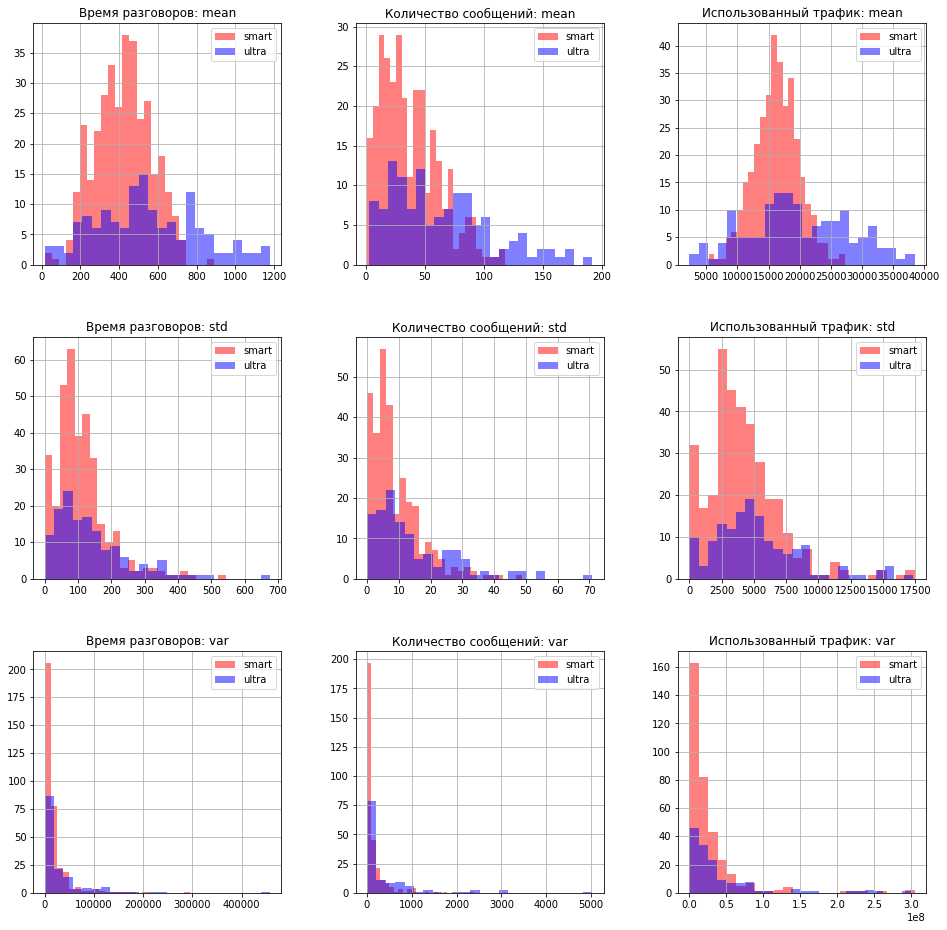

In [34]:
prop_list = ['mean', 'std', 'var']
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
row = 0
for prop in prop_list:
    col = 0
    for key in tables.keys():
        tables[key][tables[key]['tarif'] == 'smart'].hist(prop, bins=24, ax=axes[row, col], alpha=.5, color='red')
        tables[key][tables[key]['tarif'] == 'ultra'].hist(prop, bins=24, ax=axes[row, col], alpha=.5, color='blue')
        axes[row, col].set(title = key+": "+prop)
        axes[row, col].legend(['smart', 'ultra'])
        col += 1
    row += 1


## Шаг 3 Вывод

По количественным данным видно, что пользователи тарифа "Ультра" рассходуют больше трафика. По гистограммам: Смарт - в звонках видно нормальное распределение, а в остальных - пуассона. Ультра - также, но в звонках нормальное распределение менее выраженно.  Также следует учесть, что пользователей с тарифом "Смарт" больше

<hr>

# Шаг 4 Проверка гипотез
## Шаг 4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

H<sub>0</sub> - нулевая гипотеза, что средняя выручка по тарифам равна

In [35]:
ultra_series = user_month_df[user_month_df['tarif'] == 'ultra']['sum']
smart_series = user_month_df[user_month_df['tarif'] == 'smart']['sum']
print('Дисперсия Ультра:', np.var(ultra_series), '\t Среднее Ультра:', np.mean(ultra_series))
print()
print('Дисперсия Смарт:', np.var(smart_series), '\t Среднее Смарт:', np.mean(smart_series))

Дисперсия Ультра: 143200.2585801848 	 Среднее Ультра: 2071.8846549948507

Дисперсия Смарт: 671232.194819014 	 Среднее Смарт: 1296.164929768917


Дисперсии выборок разные.

In [36]:
alpha = .05 # выбираем стандартное значение
results = st.ttest_ind(
    ultra_series, 
    smart_series,
    equal_var=False # Так как дисперсии отличаются
)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0524028399519643e-243
Отвергаем нулевую гипотезу


Делаем вывод, что средняя выручка по тарифам отличается

<hr>

## Шаг 4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

H<sub>0</sub> - нулевая гипотеза, что средняя выручка по городам равна

In [37]:
msk_series = user_month_df[user_month_df['city'] == 'Москва']['sum']
not_msk_series = user_month_df[user_month_df['city'] != 'Москва']['sum']
print('Дисперсия Москва:', np.var(msk_series), '\t Среднее Москва:', np.mean(msk_series))
print()
print('Дисперсия Не Москва:', np.var(not_msk_series), '\t Среднее Не Москва:', np.mean(not_msk_series))

Дисперсия Москва: 562378.5632167415 	 Среднее Москва: 1554.637873754153

Дисперсия Не Москва: 655019.6128959145 	 Среднее Не Москва: 1528.1614906832299


Дисперсии немного отличаются

In [38]:
alpha = .05 # выбираем стандартное значение
results = st.ttest_ind(
    msk_series, 
    not_msk_series,
    equal_var=False # Так как дисперсии отличаются
)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4429886874790373
Не получилось отвергнуть нулевую гипотезу


Средняя выручка по городам не отличается

<hr>

## Шаг 5 Вывод



Проверка гипотезы о равенстве средней выручки по тарифам показала, что выручки отличаются, среднее значение больше у тарифа Ультра. <br>
А проверка гипотезы о равенстве средней выручку по городам показала, что не отличаются. Значит везде расходует одинаково